<a href="https://colab.research.google.com/github/JosuePerezValenzuela/Stock-market-prediction/blob/master/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importaciones
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings("ignore")

valid_set_size_percentage = 10
test_set_size_percentage = 10

print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/: ['run', 'libx32', 'dev', 'mnt', 'proc', 'lib32', 'boot', 'opt', 'home', 'usr', 'var', 'etc', 'bin', 'tmp', 'sbin', 'lib64', 'srv', 'media', 'lib', 'sys', 'root', '.dockerenv', 'datalab', 'tools', 'content', 'python-apt', 'python-apt.tar.xz', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.0-1_all.deb']
/content: ['.config', 'sample_data']


In [ ]:
#Lectura del dataset de kagle
df = pd.read_csv("/prices-split-adjusted.csv",index_col = 0)
#Los 5 primeros
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])


number of different stocks:  501
['BIIB', 'LB', 'PAYX', 'ABBV', 'BBBY', 'HST', 'BBY', 'HPE', 'SYK', 'ISRG']


In [ ]:
df.shape

(851264, 6)

In [ ]:
df.size

5107584

In [ ]:
df.isnull()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,False,False,False,False,False,False
2016-01-06,False,False,False,False,False,False
2016-01-07,False,False,False,False,False,False
2016-01-08,False,False,False,False,False,False
2016-01-11,False,False,False,False,False,False
...,...,...,...,...,...,...
2016-12-30,False,False,False,False,False,False
2016-12-30,False,False,False,False,False,False
2016-12-30,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
symbol,0
open,0
close,0
low,0
high,0
volume,0


In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


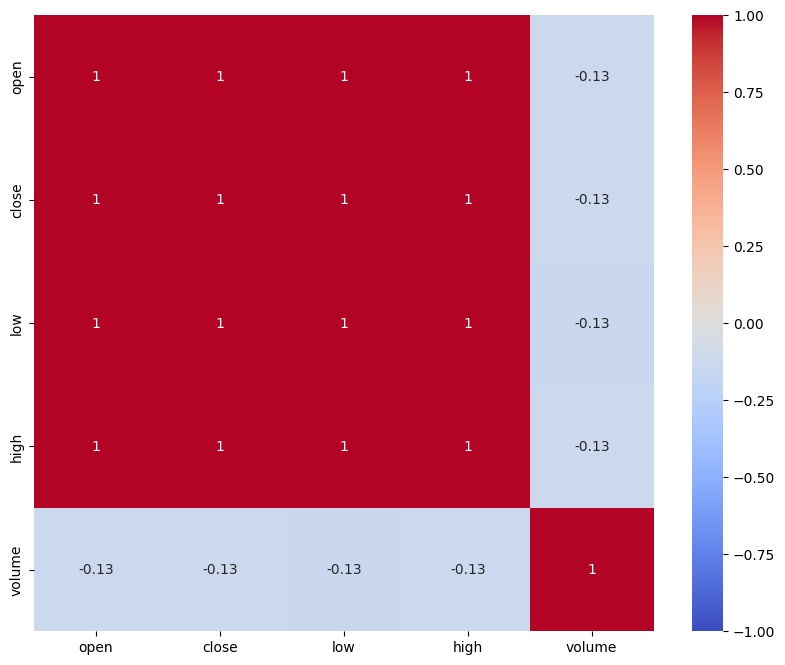

In [ ]:
#Seleccion de las columnas numericas
numeric_df = df.select_dtypes(include=['float64', 'int64'])
#Calculo de la correlacion entre las variables numericas, como 2 variables estan relacionadas
#linealmente -> 1 = Correlacion perfecta, -1 = Correlacion negativa perfecta y 0 = No hay correlacion
corr = numeric_df.corr()

# Generacion de un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

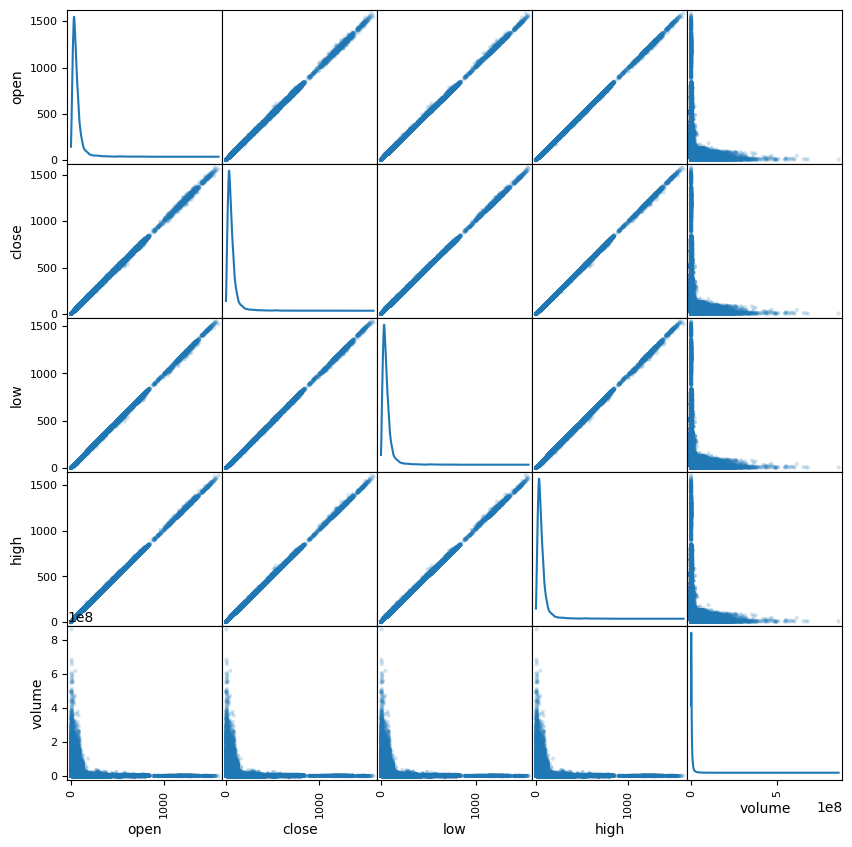

In [ ]:
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

In [ ]:
#Crea una matriz de graficos de dispersion donde cada celda muestra la relacion
#entre 2 variables numericas, se comparan con todas las combinaciones
#posibles

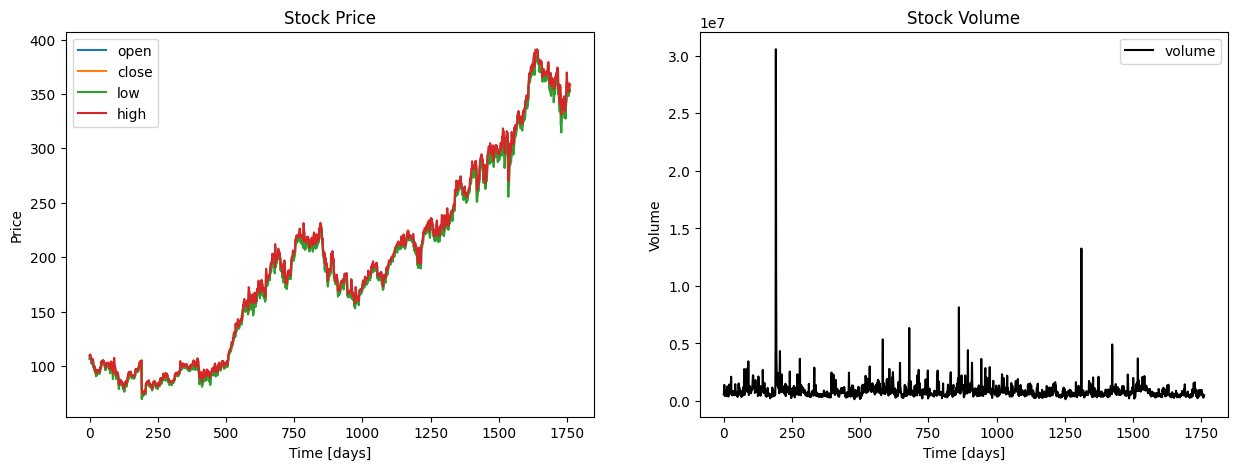

In [ ]:
#Solo donde el simbolo es EQIX grafico dias contra precio
#Como evoluciono sus precios a lo largo del tiempo
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(df[df.symbol == 'EQIX'][['open', 'close', 'low', 'high']].values)
plt.title('Stock Price')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(['open', 'close', 'low', 'high'], loc='best')
#Simbolo EQIX donde se grafica el volumen de las operaciones
#Cantidad de operaciones = numero de compras realizadas
plt.subplot(1, 2, 2)
plt.plot(df[df.symbol == 'EQIX'].volume.values, color='black')
plt.title('Stock Volume')
plt.xlabel('Time [days]')
plt.ylabel('Volume')
plt.legend(['volume'], loc='best')

plt.show()

In [ ]:
# Normaliza las columnas utilizando el metodo Min-Max
# Evita que una columna con valores muy altos domine el modelo y distorsione
# los resultados
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    for col in ['open', 'high', 'low', 'close', 'volume']:
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    return df

# Dividimos el DF en entrenamiento validacion y pruebas
def load_data(stock, seq_len):
    data = stock.to_numpy()
    sequences = [data[i:i+seq_len] for i in range(len(data) - seq_len)]
    data = np.array(sequences)

    valid_size = int(np.round(valid_set_size_percentage / 100 * data.shape[0]))
    test_size = int(np.round(test_set_size_percentage / 100 * data.shape[0]))
    train_size = data.shape[0] - valid_size - test_size

    x_train, y_train = data[:train_size, :-1], data[:train_size, -1, :]
    x_valid, y_valid = data[train_size:train_size+valid_size, :-1], data[train_size:train_size+valid_size, -1, :]
    x_test, y_test = data[train_size+valid_size:, :-1], data[train_size+valid_size:, -1, :]

    return x_train, y_train, x_valid, y_valid, x_test, y_test


df_stock = df[df.symbol == 'EQIX'][['open', 'high', 'low', 'close', 'volume']]
print("tamaño de df = ", df_stock.shape)
df_stock_norm = normalize_data(df_stock.copy())
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len=20)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ', x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)


tamaño de df =  (1762, 5)
x_train.shape =  (1394, 19, 5)
y_train.shape =  (1394, 5)
x_valid.shape =  (174, 19, 5)
y_valid.shape =  (174, 5)
x_test.shape =  (174, 19, 5)
y_test.shape =  (174, 5)


In [ ]:
#x1 -> Cantidad de secuencias
#x2 -> Dias para realizar una prediccion
#x3 -> Numero de caracteristicas tomadas en cuenta (open, high, low, close)

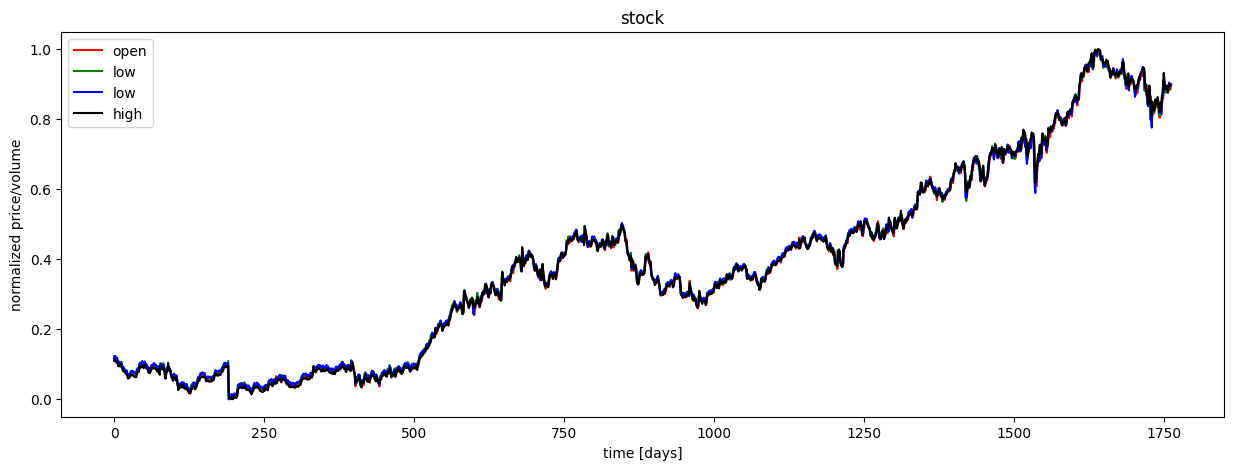

In [ ]:
#Grafica que muestra la evolucion de los precios de apertura, cierre, minimos
# y maximos de una accion en contra del tiempo
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

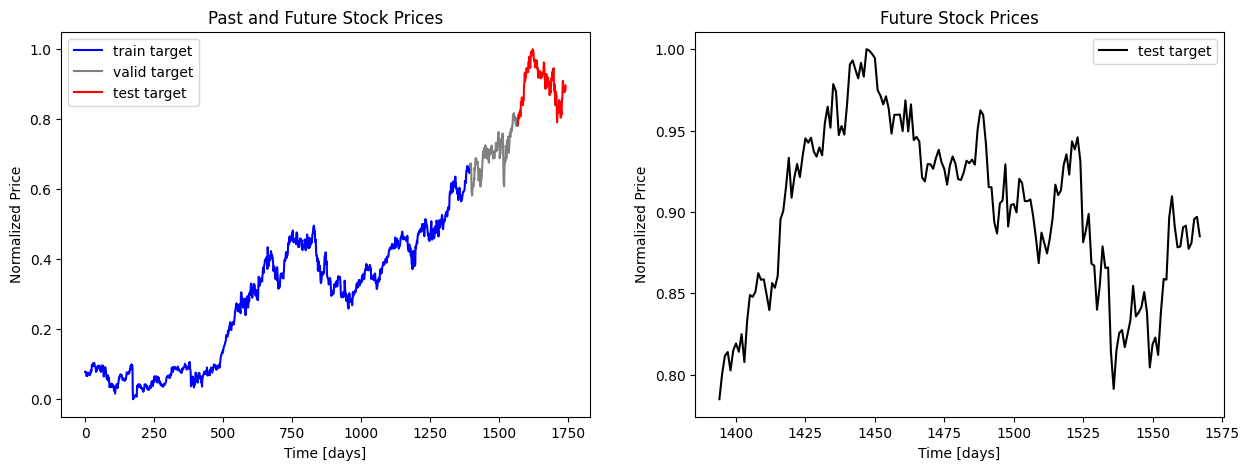

In [ ]:
#0 -> Apertura, 1 -> maximo, 2 -> bajo, 3 -> cierre
ft = 0

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(y_train.shape[0]), y_train[:, ft], 'blue', label='train target')
plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), y_valid[:, ft], 'gray', label='valid target')
plt.plot(np.arange(y_train.shape[0] + y_valid.shape[0], y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]), y_test[:, ft], 'red', label='test target')
plt.title('Past and Future Stock Prices')
plt.xlabel('Time [days]')
plt.ylabel('Normalized Price')
plt.legend(loc='best')
# Futuros precios de las acciones (Sacado del conjunto de prueba)
plt.subplot(1, 2, 2)
plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_test.shape[0]), y_test[:, ft], 'black', label='test target')
plt.title('Future Stock Prices')
plt.xlabel('Time [days]')
plt.ylabel('Normalized Price')
plt.legend(loc='best')

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

#
# PREPARACIÓN DE LOS DATOS
#
# Las columnas ['open', 'high', 'low', 'close']
# Usaremos solo esas columnas para el modelo

def prepare_data(df, seq_len=40):
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])

    sequences = []
    for i in range(len(df_scaled) - seq_len):
        sequences.append(df_scaled[i:i+seq_len])

    sequences = np.array(sequences)
    X = sequences[:, :-1]
    y = sequences[:, -1]
    return X, y, scaler

#
# CONSTRUCCIÓN DEL MODELO LSTM
#

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(5))
    model.compile(optimizer='adam', loss='mse')
    return model

#
# ENTRENAMIENTO DEL MODELO
#

# Dividir los datos
seq_len = 40
X, y, scaler = prepare_data(df_stock_norm, seq_len=seq_len)
train_size = int(0.8 * X.shape[0])
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Construir el modelo
model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0243 - val_loss: 0.0021
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - loss: 0.0021 - val_loss: 0.0048
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0020 - val_loss: 0.0045
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0015 - val_loss: 0.0062
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0010 - val_loss: 9.7871e-04
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0011 - val_loss: 7.4147e-04
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


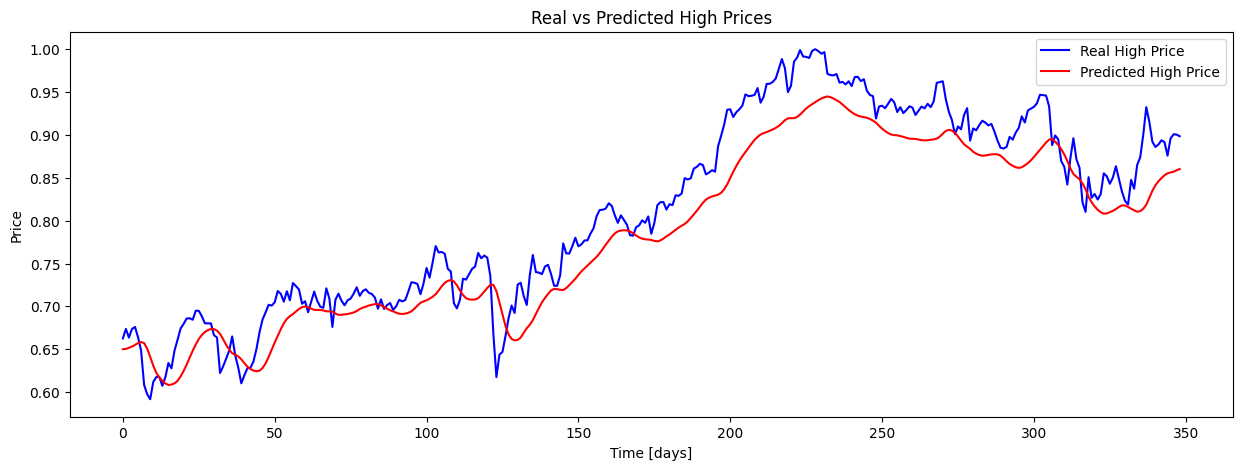

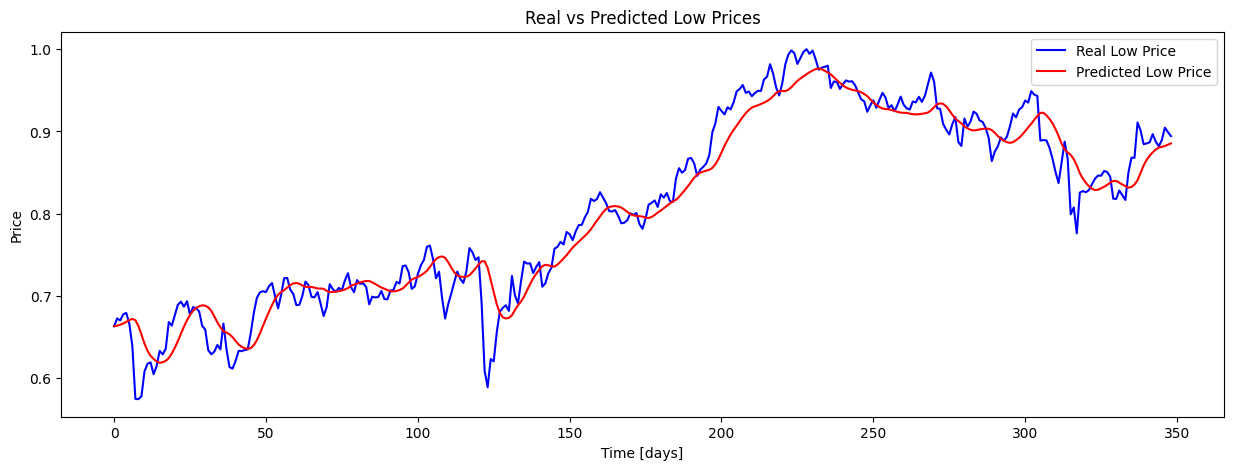

In [ ]:
#
# EVALUACIÓN Y PREDICCIONES
#

# Realizar predicciones
predictions = model.predict(X_test)

# Invertir la normalización
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Graficar las predicciones del valor más alto (High)
plt.figure(figsize=(15, 5))
plt.plot(y_test_rescaled[:, 1], color='blue', label='Real High Price')
plt.plot(predictions_rescaled[:, 1], color='red', label='Predicted High Price')
plt.title('Real vs Predicted High Prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend()
plt.show()

# Graficar las predicciones del valor más bajo (Low)
plt.figure(figsize=(15, 5))
plt.plot(y_test_rescaled[:, 2], color='blue', label='Real Low Price')
plt.plot(predictions_rescaled[:, 2], color='red', label='Predicted Low Price')
plt.title('Real vs Predicted Low Prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend()
plt.show()
